In [6]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [7]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, '')

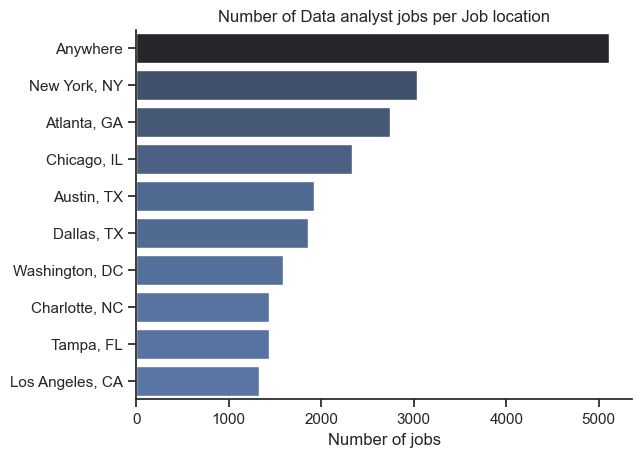

In [15]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data analyst jobs per Job location')
plt.xlabel('Number of jobs')
plt.ylabel('')


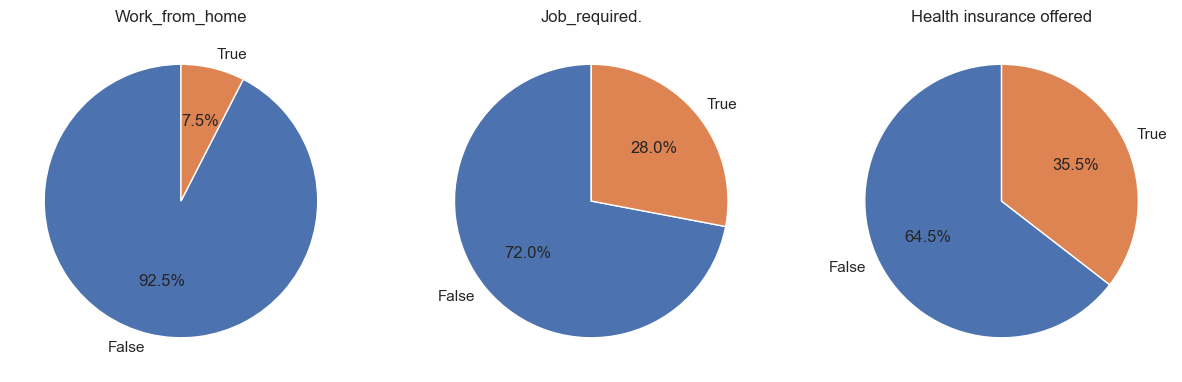

In [12]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((15,5))

dict_column = {
    'job_work_from_home': 'Work_from_home',
    'job_no_degree_mention': 'Job_required.',
    'job_health_insurance': 'Health insurance offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels = ['False','True'])
    ax[i].set_title(title)

Text(0, 0.5, '')

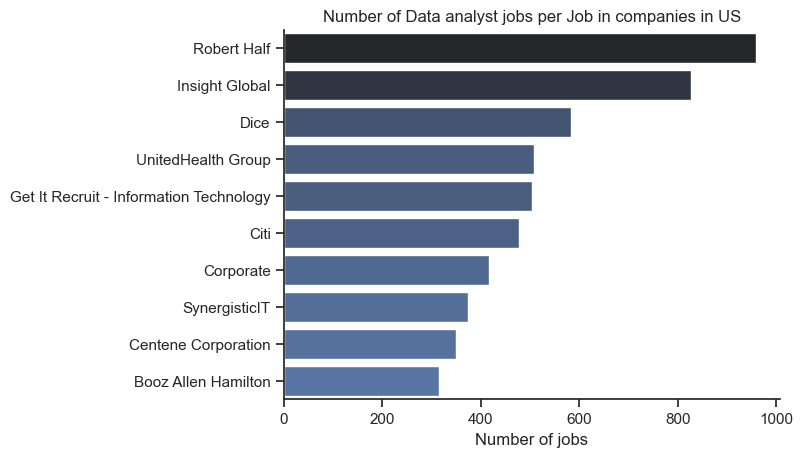

In [14]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data analyst jobs per Job in companies in US')
plt.xlabel('Number of jobs')
plt.ylabel('')